In [1]:
from tqdm.auto import tqdm
import os
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import pandas as pd
from matplotlib_venn import venn2
pd.set_option("display.max_colwidth", None)

In [3]:
driver = uc.Chrome(headless=False, use_subprocess=False)
driver.implicitly_wait(10)
driver.set_page_load_timeout(15)

In [4]:
driver.get("https://www.google.com/")

In [5]:
search_field = driver.find_element(By.TAG_NAME, "textarea")
search_field.clear()
search_field.send_keys("#menopause #supplements")
search_field.submit()

In [6]:
driver.find_element(By.LINK_TEXT, "Short videos").click()

In [7]:
for i in range(10):
    ActionChains(driver).scroll_by_amount(0, 10000).perform()
    time.sleep(1)

In [8]:
while True:
  try:
    driver.find_element(By.LINK_TEXT, "More results").click()
    print(len(driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")))
    time.sleep(1)
  except Exception as e:
    print(e)
    break

72
84
96
108
120
132
144
156
168
180
192
204
216
228
240
252
264
276
288
300
312
324
336
348
360
372
384
Message: no such element: Unable to locate element: {"method":"link text","selector":"More results"}
  (Session info: chrome=145.0.7632.75); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#nosuchelementexception
Stacktrace:
#0 0x599c12b70dba <unknown>
#1 0x599c12580682 <unknown>
#2 0x599c125d5a06 <unknown>
#3 0x599c125d5c41 <unknown>
#4 0x599c12620e14 <unknown>
#5 0x599c1261e04b <unknown>
#6 0x599c125c788f <unknown>
#7 0x599c125c8651 <unknown>
#8 0x599c12b35209 <unknown>
#9 0x599c12b38111 <unknown>
#10 0x599c12b219c9 <unknown>
#11 0x599c12b38cde <unknown>
#12 0x599c12b07d40 <unknown>
#13 0x599c12b5d408 <unknown>
#14 0x599c12b5d5d8 <unknown>
#15 0x599c12b6f403 <unknown>
#16 0x7df98a69caa4 <unknown>
#17 0x7df98a729c6c <unknown>



In [9]:
results = driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")
len(results)

385

In [10]:
parsed_results = []
for result in tqdm(results):
  link = result.find_elements(By.TAG_NAME, "a")[0].get_attribute("href")
  bits = result.text.split("\n")
  duration = bits[0]
  title = bits[1]
  bits = bits[2].split()
  source = bits[0]
  author = bits[-1]
  parsed_results.append({
    "link": link,
    "duration": duration,
    "title": title,
    "source": source,
    "author": author,
  })
df = pd.DataFrame(parsed_results)
df

  0%|          | 0/385 [00:00<?, ?it/s]

,link,duration,title,source,author
0,https://www.instagram.com/reel/DTko6n7DSJW/,2:15,Ever wonder which supplements one of the top menopause ...,Instagram,Lima
1,https://www.facebook.com/drstacysims/videos/what-supplements-do-women-need-during-menopause-vs-reproductive-yearsremember-th/4339863116335976/,1:14,"""What supplements do women need during menopause vs ...",Facebook,Sims
2,https://www.youtube.com/shorts/NKCIDv_uDUc,2:16,Supplements You May Need In Menopause with Dr. Mary ...,YouTube,Lima
3,https://www.tiktok.com/@drlouisenewson/video/7513853549743181078,1:22,Understanding the Risks of Menopause Supplements,TikTok,drlouisenewson
4,https://neurosymptoms.org/en/?vid=S8VEC4Gqhqc,1:00,Supplements that support you in menopause. Information in ...,Neuro,MD
...,...,...,...,...,...
380,https://www.facebook.com/100007842760981/posts/viralreelchallenge2026/4362035584067824/,0:07,#viralreelchallenge2026,Facebook,Healthcare
381,https://www.youtube.com/watch?v=0r7m-0KPzSw,1:06,Boost Women's Health: Top Supplements for Menstrual ...,YouTube,Health
382,https://www.tiktok.com/@koerperkompass/video/7606708526760594710,1:40,#vitamin #vitamind #vitaminb12 #magnesium,TikTok,koerperkompass
383,https://www.youtube.com/watch?v=DMW58QN_2kE,1:40,How do adaptogens help during menopause: Neolife Herbal ...,YouTube,itself.


In [11]:
df.source.value_counts()

source
Instagram            110
YouTube              104
TikTok                83
Facebook              76
Conservatoire          3
LinkedIn               2
Neuro                  1
Chemotechnique         1
Lemon8                 1
Hospital               1
WebMD                  1
Neurosymptoms.org      1
Norrköping             1
Name: count, dtype: int64

In [12]:
df[df.duplicated(subset=["duration", "title"], keep=False)]

,link,duration,title,source,author
8,https://www.facebook.com/menopausecare/videos/are-menopause-supplements-a-good-option-for-you/2180937885684642/,1:20,Vitamins and supplements: what is worth considering during ...,Facebook,Associates
13,https://www.facebook.com/menopausecare/videos/vitamins-and-supplements-what-is-worth-considering-during-perimenopause-and-meno/1014694937404298/,1:20,Vitamins and supplements: what is worth considering during ...,Facebook,Associates
14,https://www.facebook.com/drmaryclaire/videos/menopause-supplements/1846668636114680/,1:00,The best supplements for menopause health Dr. Mary Claire ...,Facebook,Haver
20,https://www.facebook.com/drmaryclaire/videos/menopause-supplements/2190968454589464/,2:46,Even if you choose not to support our businesses through the ...,Facebook,Haver
29,https://www.facebook.com/drmaryclaire/videos/menopause-supplements/8801684983263848/,1:00,The best supplements for menopause health Dr. Mary Claire ...,Facebook,Haver
30,https://www.facebook.com/drmaryclaire/videos/menopause-supplements/279407765264634/,2:46,Even if you choose not to support our businesses through the ...,Facebook,Haver
51,https://www.facebook.com/drmaryclaire/videos/creatine-supplementation-has-been-shown-to-improve-strength-and-performance-in-w/1085767870208430/,1:21,Creatine supplementation has been shown to improve ...,Facebook,Haver
60,https://www.facebook.com/drmaryclaire/videos/creatine-supplementation-has-been-shown-to-improve-strength-and-performance-in-w/1968779740582820/,1:21,Creatine supplementation has been shown to improve ...,Facebook,Haver
117,https://hospitalgermanstrias.cat/html/js/editor/fckeditor/editor/filemanager/browser/default/browser.html?vid=7zEwePteN6E&Connector=%2F%5C%2Fn1%2Etrustgo%2Etop%2Fvision%2F,0:35,Best Supplements For Clear Vision During Menopause ...,Hospital,Pujol
127,https://www.norrkopingairport.se/js/fckeditor/editor/filemanager/browser/default/browser.html?vid=7zEwePteN6E&Connector=%2F%5C%2Fn1%2Etrustgo%2Etop%2Fvision%2F,0:35,Best Supplements For Clear Vision During Menopause ...,Norrköping,Airport


In [13]:
search_field = driver.find_element(By.TAG_NAME, "textarea")
search_field.clear()
search_field.send_keys("#menopause #vitamins")
search_field.submit()

In [14]:
for i in range(10):
    ActionChains(driver).scroll_by_amount(0, 10000).perform()
    time.sleep(1)

In [15]:
while True:
  try:
    driver.find_element(By.LINK_TEXT, "More results").click()
    print(len(driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")))
    time.sleep(1.5)
  except Exception as e:
    print(e)
    break

72
84
96
108
120
132
144
156
168
180
192
204
216
228
240
252
264
276
288
300
312
324
336
348
360
372
384
Message: no such element: Unable to locate element: {"method":"link text","selector":"More results"}
  (Session info: chrome=145.0.7632.75); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#nosuchelementexception
Stacktrace:
#0 0x599c12b70dba <unknown>
#1 0x599c12580682 <unknown>
#2 0x599c125d5a06 <unknown>
#3 0x599c125d5c41 <unknown>
#4 0x599c12620e14 <unknown>
#5 0x599c1261e04b <unknown>
#6 0x599c125c788f <unknown>
#7 0x599c125c8651 <unknown>
#8 0x599c12b35209 <unknown>
#9 0x599c12b38111 <unknown>
#10 0x599c12b219c9 <unknown>
#11 0x599c12b38cde <unknown>
#12 0x599c12b07d40 <unknown>
#13 0x599c12b5d408 <unknown>
#14 0x599c12b5d5d8 <unknown>
#15 0x599c12b6f403 <unknown>
#16 0x7df98a69caa4 <unknown>
#17 0x7df98a729c6c <unknown>



In [16]:
results = driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")
len(results)

386

In [17]:
parsed_results = []
for result in tqdm(results):
  link = result.find_elements(By.TAG_NAME, "a")[0].get_attribute("href")
  bits = result.text.split("\n")
  duration = bits[0]
  title = bits[1]
  bits = bits[2].split()
  source = bits[0]
  author = bits[-1]
  parsed_results.append({
    "link": link,
    "duration": duration,
    "title": title,
    "source": source,
    "author": author,
  })
df2 = pd.DataFrame(parsed_results)
df2

  0%|          | 0/386 [00:00<?, ?it/s]

,link,duration,title,source,author
0,https://www.youtube.com/shorts/NKCIDv_uDUc,2:16,Supplements You May Need In Menopause with Dr. Mary ...,YouTube,Lima
1,https://www.facebook.com/menopausecare/videos/are-menopause-supplements-a-good-option-for-you/2180937885684642/,1:20,Vitamins and supplements: what is worth considering during ...,Facebook,Associates
2,https://www.instagram.com/reel/DHchFJhsw8L/?hl=en,2:27,Navigating perimenopause & menopause? These 5 ...,Instagram,FACOG
3,https://neurosymptoms.org/en/?vid=S8VEC4Gqhqc,1:00,Supplements that support you in menopause. Information in ...,Neuro,MD
4,https://www.facebook.com/menopausecare/videos/vitamins-and-supplements-what-is-worth-considering-during-perimenopause-and-meno/1014694937404298/,1:20,Vitamins and supplements: what is worth considering during ...,Facebook,Associates
...,...,...,...,...,...
381,https://www.lemon8-app.com/@mr.gen_pharmacist/7408529889801863697?region=my,0:36,Pengambilan Vitamin Penting untuk Wanita Menopause,Lemon8,mr.gen_pharmacist
382,https://www.youtube.com/watch?v=0r7m-0KPzSw,1:06,Boost Women's Health: Top Supplements for Menstrual ...,YouTube,Health
383,https://www.facebook.com/LearningPetals/videos/dont-ignore-these-home-hacks-they-work-fast-save-this-before-you-need-it-/2997127243830001/,0:15,Don’t ignore these home hacks… they work FAST ⚡Save this ...,Facebook,Petals
384,https://www.youtube.com/shorts/O2q781QFqjk,0:51,Menopause Relief: The Two Supplements Every Woman ...,YouTube,Kappel


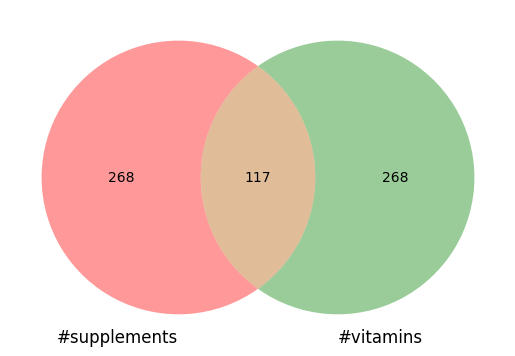

In [18]:
venn2([set(df.link), set(df2.link)], set_labels = ('#supplements', '#vitamins'))

In [19]:
df = pd.concat([df, df2]).drop_duplicates()
df

,link,duration,title,source,author
0,https://www.instagram.com/reel/DTko6n7DSJW/,2:15,Ever wonder which supplements one of the top menopause ...,Instagram,Lima
1,https://www.facebook.com/drstacysims/videos/what-supplements-do-women-need-during-menopause-vs-reproductive-yearsremember-th/4339863116335976/,1:14,"""What supplements do women need during menopause vs ...",Facebook,Sims
2,https://www.youtube.com/shorts/NKCIDv_uDUc,2:16,Supplements You May Need In Menopause with Dr. Mary ...,YouTube,Lima
3,https://www.tiktok.com/@drlouisenewson/video/7513853549743181078,1:22,Understanding the Risks of Menopause Supplements,TikTok,drlouisenewson
4,https://neurosymptoms.org/en/?vid=S8VEC4Gqhqc,1:00,Supplements that support you in menopause. Information in ...,Neuro,MD
...,...,...,...,...,...
374,https://www.youtube.com/shorts/B6pWdBGdy8M,0:14,Menopause Vitamins. #hotflashes #nightsweats #menopause ...,YouTube,Remedy
377,https://www.tiktok.com/@tiktokvic26/video/7607783233866059030,0:59,Menopause relief patches #menopause #menopausal ...,TikTok,tiktokvic26
380,https://www.facebook.com/61586632026100/posts/comment-rhodiola-and-ill-tell-you-exactly-where-to-get-the-highest-quality-super/122111122917221067/,0:24,Comment ”Rhodiola” and I'll tell you exactly where to get the ...,Facebook,Luna
381,https://www.lemon8-app.com/@mr.gen_pharmacist/7408529889801863697?region=my,0:36,Pengambilan Vitamin Penting untuk Wanita Menopause,Lemon8,mr.gen_pharmacist


In [20]:
df[df.duplicated(subset=["duration", "title"], keep=False)]

,link,duration,title,source,author
4,https://neurosymptoms.org/en/?vid=S8VEC4Gqhqc,1:00,Supplements that support you in menopause. Information in ...,Neuro,MD
8,https://www.facebook.com/menopausecare/videos/are-menopause-supplements-a-good-option-for-you/2180937885684642/,1:20,Vitamins and supplements: what is worth considering during ...,Facebook,Associates
13,https://www.facebook.com/menopausecare/videos/vitamins-and-supplements-what-is-worth-considering-during-perimenopause-and-meno/1014694937404298/,1:20,Vitamins and supplements: what is worth considering during ...,Facebook,Associates
14,https://www.facebook.com/drmaryclaire/videos/menopause-supplements/1846668636114680/,1:00,The best supplements for menopause health Dr. Mary Claire ...,Facebook,Haver
20,https://www.facebook.com/drmaryclaire/videos/menopause-supplements/2190968454589464/,2:46,Even if you choose not to support our businesses through the ...,Facebook,Haver
29,https://www.facebook.com/drmaryclaire/videos/menopause-supplements/8801684983263848/,1:00,The best supplements for menopause health Dr. Mary Claire ...,Facebook,Haver
30,https://www.facebook.com/drmaryclaire/videos/menopause-supplements/279407765264634/,2:46,Even if you choose not to support our businesses through the ...,Facebook,Haver
51,https://www.facebook.com/drmaryclaire/videos/creatine-supplementation-has-been-shown-to-improve-strength-and-performance-in-w/1085767870208430/,1:21,Creatine supplementation has been shown to improve ...,Facebook,Haver
59,https://www.facebook.com/drmaryclaire/videos/a-new-study-found-that-women-who-supplemented-with-vitamin-d-had-a-significantly/683650841508225/,1:09,A new study found that women who supplemented with ...,Facebook,Haver
60,https://www.facebook.com/drmaryclaire/videos/creatine-supplementation-has-been-shown-to-improve-strength-and-performance-in-w/1968779740582820/,1:21,Creatine supplementation has been shown to improve ...,Facebook,Haver


In [21]:
df.source.value_counts()

source
Instagram            178
YouTube              168
TikTok               152
Facebook             127
Lemon8                 5
Conservatoire          5
X                      3
Chemotechnique         2
LinkedIn               2
Amazon.com             2
Hospital               1
Neuro                  1
Neurosymptoms.org      1
Norrköping             1
mySTAR                 1
Haryana                1
Министерство           1
고신대학교복음병원              1
WebMD                  1
Name: count, dtype: int64

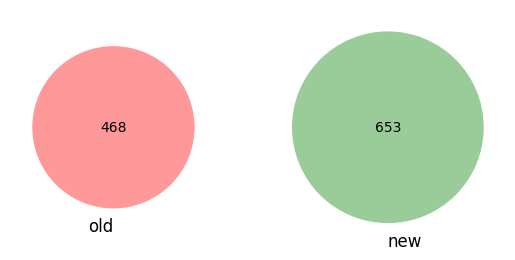

In [22]:
old_df = pd.read_csv("googlesearch.csv")
venn2([set(old_df.link), set(df.link)], set_labels = ('old', 'new'))

In [23]:
df[~df.link.isin(old_df.link)]

,link,duration,title,source,author
0,https://www.instagram.com/reel/DTko6n7DSJW/,2:15,Ever wonder which supplements one of the top menopause ...,Instagram,Lima
1,https://www.facebook.com/drstacysims/videos/what-supplements-do-women-need-during-menopause-vs-reproductive-yearsremember-th/4339863116335976/,1:14,"""What supplements do women need during menopause vs ...",Facebook,Sims
2,https://www.youtube.com/shorts/NKCIDv_uDUc,2:16,Supplements You May Need In Menopause with Dr. Mary ...,YouTube,Lima
3,https://www.tiktok.com/@drlouisenewson/video/7513853549743181078,1:22,Understanding the Risks of Menopause Supplements,TikTok,drlouisenewson
4,https://neurosymptoms.org/en/?vid=S8VEC4Gqhqc,1:00,Supplements that support you in menopause. Information in ...,Neuro,MD
...,...,...,...,...,...
374,https://www.youtube.com/shorts/B6pWdBGdy8M,0:14,Menopause Vitamins. #hotflashes #nightsweats #menopause ...,YouTube,Remedy
377,https://www.tiktok.com/@tiktokvic26/video/7607783233866059030,0:59,Menopause relief patches #menopause #menopausal ...,TikTok,tiktokvic26
380,https://www.facebook.com/61586632026100/posts/comment-rhodiola-and-ill-tell-you-exactly-where-to-get-the-highest-quality-super/122111122917221067/,0:24,Comment ”Rhodiola” and I'll tell you exactly where to get the ...,Facebook,Luna
381,https://www.lemon8-app.com/@mr.gen_pharmacist/7408529889801863697?region=my,0:36,Pengambilan Vitamin Penting untuk Wanita Menopause,Lemon8,mr.gen_pharmacist


In [30]:
df = pd.concat([df, old_df]).drop_duplicates()
df

,link,duration,title,source,author
0,https://www.instagram.com/reel/DBjTKzcRj_3/,1:09,Comment 'Help' to learn more about Time-out Training I know ...,Instagram,livjowen
1,https://www.tiktok.com/@bratbustersparenting/video/7307422793077886214,0:33,Effective Parenting: Managing Timeout Strategies,TikTok,bratbustersparenting
2,https://www.instagram.com/reel/DCHwWHnPu89/?hl=en,1:29,✨ Let’s talk about when (and when not) to use time-outs with ...,Instagram,livjowen
3,https://www.instagram.com/reel/DLAH-Lsy1-w/,0:58,Why Timeouts Don't Work: A Parent's Guide to Calm Discipline ...,Instagram,bratbustersparenting
4,https://www.tiktok.com/@livjowen/video/7434987155497258282?lang=en,1:29,Understanding Time-Outs for Toddlers: A Quick Guide,TikTok,livjowen
...,...,...,...,...,...
406,https://www.tiktok.com/@cynthiajessica117/video/7335046819203779873,0:58,Por fin! Gloria Trevi demandará a Sergio Andrade ...,TikTok,cynthiajessica117
407,https://www.tiktok.com/@fedfreestyle/video/7519461553020669206,1:14,Il calciatore che perse un dito per esultanza,TikTok,fedfreestyle
408,https://www.tiktok.com/@artgrfite2/video/7227962410596945157?lang=en,0:12,desenhos para fazer no caderno #graffiti #Anime #arte ...,TikTok,artgrfite2
409,https://www.tiktok.com/@putiadellostello/video/7395608101220551969,0:25,Il ristorante con grotta lavica a Catania,TikTok,putiadellostello


In [24]:
df.to_csv("supplements.csv", index=False)

In [25]:
df.link.to_csv("supplements_links.txt",index=False,header=False)